In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, binom

In [5]:
df = pd.read_json('source/hdfc_loan_dataset_cleaned.json')
print(f"Dataset: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset: 1000 rows, 47 columns


,Loan_ID,Bank,Customer_Name,Gender,Married,Dependents,Education,Employment_Status,Applicant_Income,Coapplicant_Income,...,Loan_to_Annual_Income,Customer_Sentiment,Religion,State,City,PIN_Code,Aadhaar_Synthetic,Phone_Number,Email,Occupation
0,HDFC100001,HDFC Bank,Rohan Verma,Male,No,2,Graduate,Salaried,56976,0,...,11.747,Positive,Hindu,Delhi,Dwarka,857743,694000000000,9068671773,rohan.verma@example.in,Farmer
1,HDFC100002,HDFC Bank,Rohan Verma,Male,No,0,Graduate,Unemployed,1856,0,...,40.381,Negative,Hindu,Punjab,Ludhiana,863836,633000000000,9990772625,rohan.verma@example.in,Civil Engineer
2,HDFC100003,HDFC Bank,Aditya Nair,Female,Yes,0,Graduate,Salaried,64553,0,...,3.082,Positive,Hindu,Maharashtra,Nagpur,834796,166000000000,9195085016,aditya.nair@example.in,Medical Representative
3,HDFC100004,HDFC Bank,Ananya Joshi,Male,No,0,Graduate,Salaried,88450,0,...,0.621,Negative,Hindu,Gujarat,Vadodara,438590,55281832538,9179335548,ananya.joshi@example.in,Marketing Executive
4,HDFC100005,HDFC Bank,Harpreet Singh,Male,Yes,3,Graduate,Self-Employed,9539,0,...,1.736,Neutral,Sikh,West Bengal,Kolkata,495224,156000000000,9795137116,harpreet.singh@example.in,Shopkeeper


## Q1

In [6]:
cols = ['Applicant_Income', 'Loan_Amount', 'Age']
stats_df = pd.DataFrame(index=['Mean', 'Median', 'Mode', 'Variance', 'Std Dev'])

for col in cols:
    stats_df.loc['Mean', col] = df[col].mean()
    stats_df.loc['Median', col] = df[col].median()
    stats_df.loc['Mode', col] = df[col].mode()[0]
    stats_df.loc['Variance', col] = df[col].var()
    stats_df.loc['Std Dev', col] = df[col].std()

cv = (stats_df.loc['Std Dev'] / stats_df.loc['Mean']) * 100
print(stats_df)
print("\nCV %:", cv)

          Applicant_Income   Loan_Amount        Age
Mean          4.243006e+04  2.216713e+06  34.412000
Median        4.067550e+04  9.720460e+05  35.000000
Mode          3.000000e+03  1.884000e+03  35.000000
Variance      7.914775e+08  6.943335e+12  73.489746
Std Dev       2.813321e+04  2.635021e+06   8.572616

CV %: Applicant_Income     66.304909
Loan_Amount         118.870645
Age                  24.911705
dtype: float64


## Q2

In [7]:
print(df['CIBIL_Score'].describe(percentiles=[.25, .5, .75])[['min', '25%', '50%', '75%', 'max']])

min    384.00
25%    605.75
50%    654.00
75%    704.00
max    878.00
Name: CIBIL_Score, dtype: float64


## Q3

In [8]:
cv_applicant = (df['Applicant_Income'].std() / df['Applicant_Income'].mean()) * 100
cv_household = (df['Annual_Household_Income'].std() / df['Annual_Household_Income'].mean()) * 100
print(f"CV Applicant: {cv_applicant:.2f}%")
print(f"CV Household: {cv_household:.2f}%")

CV Applicant: 66.30%
CV Household: 75.49%


## Q4

In [9]:
total = len(df)
p_approved = len(df[df['Loan_Status'] == 'Approved']) / total
p_good_credit = len(df[df['Credit_History'] == 1]) / total
p_both = len(df[(df['Loan_Status'] == 'Approved') & (df['Credit_History'] == 1)]) / total
print(f"P(Approved): {p_approved:.4f}")
print(f"P(Good Credit): {p_good_credit:.4f}")
print(f"P(Both): {p_both:.4f}")

P(Approved): 0.6530
P(Good Credit): 0.7230
P(Both): 0.5360


## Q5

In [10]:
good_credit = df[df['Credit_History'] == 1]
p_approved_given_good = len(good_credit[good_credit['Loan_Status'] == 'Approved']) / len(good_credit)
print(f"P(Approved | Good Credit): {p_approved_given_good:.4f}")

P(Approved | Good Credit): 0.7414


## Q6

In [11]:
p_self = len(df[df['Employment_Status'] == 'Self-Employed']) / total
p_high = len(df[df['Loan_Amount'] > 1000000]) / total
print(f"P(Self-Employed): {p_self:.4f}")
print(f"P(Loan > 10L): {p_high:.4f}")

P(Self-Employed): 0.2440
P(Loan > 10L): 0.4930


## Q7

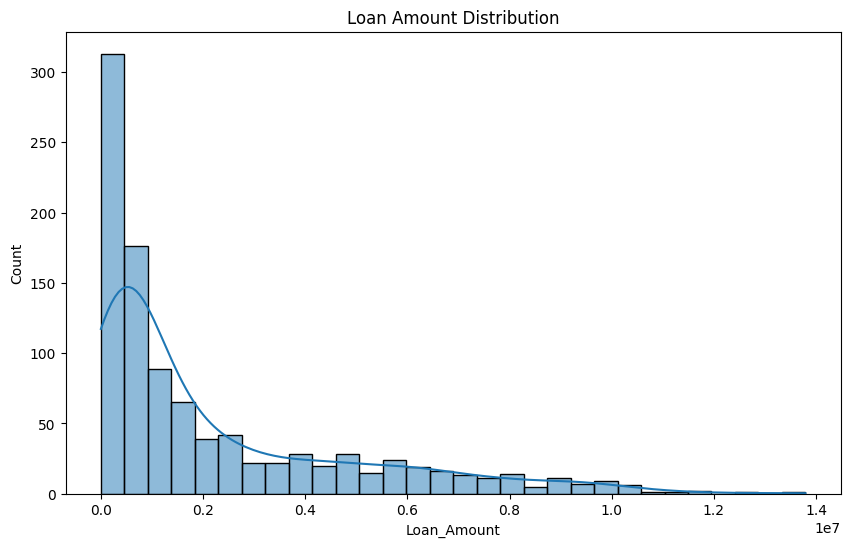

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Loan_Amount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.show()

## Q8

In [13]:
stat, p_val = stats.shapiro(df['Applicant_Income'])
print(f"Statistic: {stat:.4f}, p-value: {p_val:.4e}")

Statistic: 0.9647, p-value: 7.7405e-15


## Q9

In [14]:
approved = df[df['Loan_Status'] == 'Approved']
p_urban = len(approved[approved['Property_Area'] == 'Urban']) / len(approved)
print(f"P(Urban | Approved): {p_urban:.4f}")

P(Urban | Approved): 0.3675


## Q10

In [15]:
P_GC = len(df[df['Credit_History'] == 1]) / total
P_A = len(df[df['Loan_Status'] == 'Approved']) / total
bayes = (p_approved_given_good * P_GC) / P_A
direct = len(approved[approved['Credit_History'] == 1]) / len(approved)
print(f"Bayes: {bayes:.4f}")
print(f"Direct: {direct:.4f}")

Bayes: 0.8208
Direct: 0.8208


## Q11

In [16]:
cov_vars = ['Applicant_Income', 'Loan_Amount', 'CIBIL_Score', 'Debt_to_Income_Ratio']
cov_matrix = df[cov_vars].cov()
print(cov_matrix)

                      Applicant_Income   Loan_Amount   CIBIL_Score  \
Applicant_Income          7.914775e+08  7.533140e+08  6.380233e+04   
Loan_Amount               7.533140e+08  6.943335e+12  3.160924e+06   
CIBIL_Score               6.380233e+04  3.160924e+06  5.451835e+03   
Debt_to_Income_Ratio     -6.275243e+06  5.877618e+07  3.442670e+03   

                      Debt_to_Income_Ratio  
Applicant_Income             -6.275243e+06  
Loan_Amount                   5.877618e+07  
CIBIL_Score                   3.442670e+03  
Debt_to_Income_Ratio          3.899042e+06  


## Q12

In [17]:
corr1 = df['Loan_Amount'].corr(df['Annual_Household_Income'])
corr2 = df['Loan_Amount'].corr(df['CIBIL_Score'])
print(f"Loan_Amount vs Annual_Household_Income: {corr1:.4f}")
print(f"Loan_Amount vs CIBIL_Score: {corr2:.4f}")

Loan_Amount vs Annual_Household_Income: 0.0287
Loan_Amount vs CIBIL_Score: 0.0162


## Q13

In [18]:
grad = df[df['Education'] == 'Graduate']['Loan_Amount']
non_grad = df[df['Education'] == 'Not Graduate']['Loan_Amount']
t_stat, p_val = stats.ttest_ind(grad, non_grad)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Reject H0: {p_val < 0.05}")

t-statistic: -0.8755
p-value: 0.3815
Reject H0: False


## Q14

In [19]:
contingency = pd.crosstab(df['Gender'], df['Loan_Status'])
chi2, p_val, dof, expected = chi2_contingency(contingency)
print(f"Chi2: {chi2:.4f}")
print(f"p-value: {p_val:.4f}")
print(f"Independent: {p_val > 0.05}")

Chi2: 0.6842
p-value: 0.7103
Independent: True


## Q15

In [20]:
mean_loan = df['Loan_Amount'].mean()
se = stats.sem(df['Loan_Amount'])
ci = stats.t.interval(0.95, len(df)-1, loc=mean_loan, scale=se)
print(f"95% CI: ({ci[0]:.2f}, {ci[1]:.2f})")

95% CI: (2053197.51, 2380228.30)


## Q16

In [21]:
mean_dti = df['Debt_to_Income_Ratio'].mean()
se_dti = stats.sem(df['Debt_to_Income_Ratio'])
ci_dti = stats.t.interval(0.95, len(df)-1, loc=mean_dti, scale=se_dti)
print(f"95% CI: ({ci_dti[0]:.4f}, {ci_dti[1]:.4f})")

95% CI: (25.5850, 270.6513)


## Q17

In [22]:
pop_mean = df['Applicant_Income'].mean()
sample_sizes = [10, 50, 100, 500, 1000]
sample_means = []

for n in sample_sizes:
    means = [df['Applicant_Income'].sample(n).mean() for _ in range(100)]
    sample_means.append(np.mean(means))
    print(f"n={n}: {np.mean(means):.2f}")

print(f"Population mean: {pop_mean:.2f}")

n=10: 41843.02
n=50: 41906.57
n=100: 42663.43
n=500: 42363.29
n=1000: 42430.06
Population mean: 42430.06


## Q18

In [23]:
df['Loan_Binary'] = (df['Loan_Status'] == 'Approved').astype(int)
p = df['Loan_Binary'].mean()
var = p * (1 - p)
print(f"Mean: {p:.4f}")
print(f"Variance: {var:.4f}")

Mean: 0.6530
Variance: 0.2266


## Q19

In [24]:
n = 50
prob_at_least_30 = 1 - binom.cdf(29, n, p)
print(f"P(X >= 30): {prob_at_least_30:.4f}")

P(X >= 30): 0.8258


## Q20

In [25]:
segment = df[(df['CIBIL_Score'] > 750) & (df['Debt_to_Income_Ratio'] < 0.35)]
p_approval = len(segment[segment['Loan_Status'] == 'Approved']) / len(segment)
print(f"P(Approved | High CIBIL & Low DTI): {p_approval:.4f}")
print(f"Segment size: {len(segment)} ({len(segment)/len(df)*100:.1f}%)")

P(Approved | High CIBIL & Low DTI): 1.0000
Segment size: 45 (4.5%)


## Q21

In [26]:
expected_loan = approved['Loan_Amount'].mean()
print(f"E(Loan | Approved): {expected_loan:.2f}")

E(Loan | Approved): 1866064.25


## Q22

In [27]:
df['Approval_Binary'] = (df['Loan_Status'] == 'Approved').astype(int)

corr_cibil = df['CIBIL_Score'].corr(df['Approval_Binary'])
corr_dti = df['Debt_to_Income_Ratio'].corr(df['Approval_Binary'])
corr_emp = df['Employment_Length_Years'].corr(df['Approval_Binary'])

print(f"CIBIL_Score: {corr_cibil:.4f}")
print(f"Debt_to_Income_Ratio: {corr_dti:.4f}")
print(f"Employment_Length_Years: {corr_emp:.4f}")

approved_grp = df[df['Loan_Status'] == 'Approved']
rejected_grp = df[df['Loan_Status'] == 'Rejected']

t1, p1 = stats.ttest_ind(approved_grp['CIBIL_Score'], rejected_grp['CIBIL_Score'])
t2, p2 = stats.ttest_ind(approved_grp['Debt_to_Income_Ratio'], rejected_grp['Debt_to_Income_Ratio'])
t3, p3 = stats.ttest_ind(approved_grp['Employment_Length_Years'], rejected_grp['Employment_Length_Years'])

print(f"\nCIBIL p-value: {p1:.4e}")
print(f"DTI p-value: {p2:.4e}")
print(f"Employment p-value: {p3:.4e}")

CIBIL_Score: 0.2569
Debt_to_Income_Ratio: -0.1028
Employment_Length_Years: 0.0946

CIBIL p-value: 1.5536e-16
DTI p-value: 1.1374e-03
Employment p-value: 2.7601e-03
